In [12]:
from operator import add
from typing import TypedDict, Annotated
from rich.console import Console

from langgraph.graph import StateGraph, START, END

In [13]:
console = Console()

### Define the graph state

In [14]:
class State(TypedDict):
    foo: int
    bar: Annotated[list[str], add]

In [15]:
state = State(foo=1, bar=["Hello"])
state

{'foo': 1, 'bar': ['Hello']}

In [ ]:
# nodes, which update only parts (or certain members) of the State


def update_foo(state: State):
    # just updates foo & not bar

    return {"foo": 2}


def update_bar(state: State):
    # modified just bar - because bar is a Annotated[list[str], add],
    # this will append to bar
    return {"bar": ["World!"]}

In [17]:
# build my graph
builder = StateGraph(State)
# add nodes
builder.add_node("update_foo", update_foo)
builder.add_node("update_bar", update_bar)
# add edges
builder.add_edge(START, "update_foo")
builder.add_edge("update_foo", "update_bar")
builder.add_edge("update_bar", END)
# build the graph
graph = builder.compile()

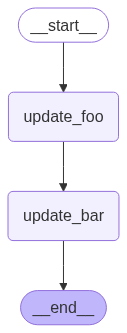

In [18]:
# display the graph
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
# invoke the graph
result = graph.invoke(state)
console.print(result)

{'foo': 2, 'bar': ['Hello', 'World!']}